In a linear classifier, the equation of a line is given by

$$z = wv + b$$

If we can separate the data with a line, we can use that line to classify the sample

<img src="images/linear_classifier.svg" width="30%"/>

If we use the line to calculate the class of a point, it always returns a positive or negative number, such as 3, -2 and so on.
In order to convert these numbers into classes (0 or 1), we can apply a threshold such as

$$
\left\{\begin{matrix}
\hat{y} = 1 &\ \ \ \text{if} \hspace{15pt} z >= 0 \\ 
\hat{y} = 0 & \text{if} \hspace{15pt} z < 0
\end{matrix}\right.
$$

Thus, we can use a plot to print this information.

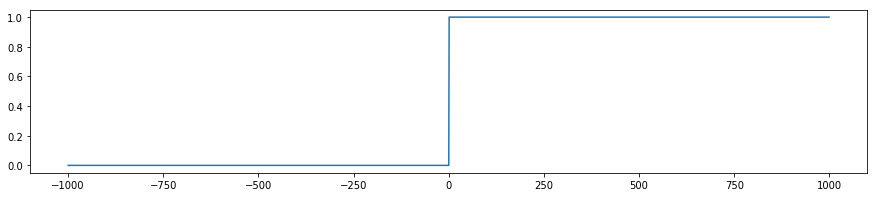

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(15,3))

x = range(-1000,1000)
y = []
for v in x:
    y.append(1 if v > 0 else 0)
plt.plot(x, y)
plt.show()

# Logistic Regression

Logistic Regression seem like a linear regression with a smooth transition. It is given by the equation

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

where $\sigma(z)$ with $z=-4$ is approximately zero and $\sigma(z)$ with $z=4$ is approximately one, i.e, $\sigma(-4)\approx 0$ and $\sigma(4)\approx 1$, as illustred by the plot.

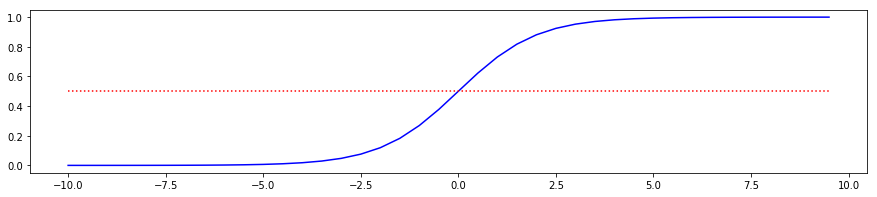

In [21]:
import numpy as np
plt.figure(figsize=(15,3))

def sigmoid(z):
    z = np.array(z)
    y = 1./(1+np.exp(-z))
    return y

x = np.arange(-10, 10, 0.5)
center = [0.5]*len(x)
y = sigmoid(x)
plt.plot(x, y, 'b')
plt.plot(x, center, ':r')
plt.show()

Logistic function can also be understood as the probability $p(y=1|x_1,w) = \sigma(wx_1 + b)$. For example, consider

$p(y=1|x_1,w) = \sigma(w^Tx_1 + b)$<br>
$z = w^Tx_1 + b$<br>
$z = [-1, 1]\begin{bmatrix}
2 \\
0 
\end{bmatrix}$<br>
$p(y=1|x_1,w) = \sigma(z)$<br>
$p(y=1|x_1,w) = \sigma(2) = 0.88$

# Logistic Function in PyTorch

There are two ways of using Sigmoid function in PyTorch. The first one is using the `nn.Sigmoid()` fucntion and the other is using `F.Sigmoid(z)` as presented below:

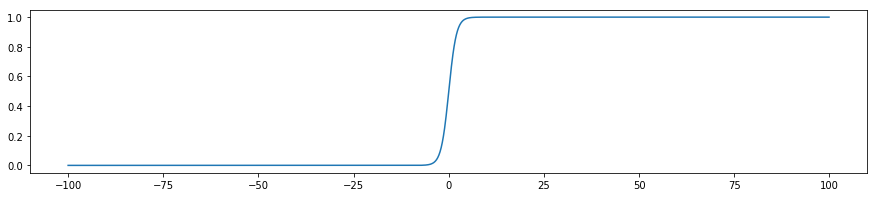

In [4]:
%matplotlib inline
plt.figure(figsize=(15,3))

import torch
import torch.nn as nn
import matplotlib.pyplot as plt

z = torch.arange(-100, 100, 0.1).view(-1, 1)
sig = nn.Sigmoid()
yhat = sig(z)
plt.plot(z.numpy(), yhat.numpy())
plt.show()

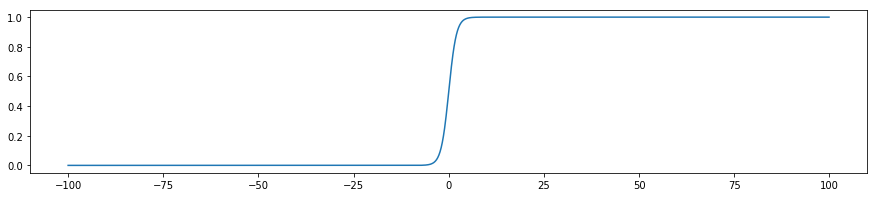

In [6]:
import torch.nn.functional as F
plt.figure(figsize=(15,3))

z = torch.arange(-100, 100, 0.1).view(-1, 1)
yhat = F.sigmoid(z)
plt.plot(z.numpy(), yhat.numpy())
plt.show()

# The Logistic Regression Module

The sequential module will pass information in a sequence. Thus, in the model below, the model send the input `x` first to the `Linear()` module and then to the `Sigmoid()` module.

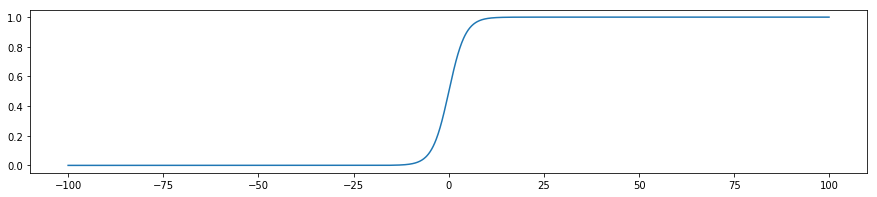

In [17]:
plt.figure(figsize=(15,3))
z = torch.arange(-100, 100, 0.1).view(-1, 1)
model = nn.Sequential(nn.Linear(1, 1), nn.Sigmoid())
yhat = model(z)
plt.plot(z.numpy(), yhat.detach().numpy())
plt.show()

You can also build a custom module for logistic regression using the `nn.Module` class:

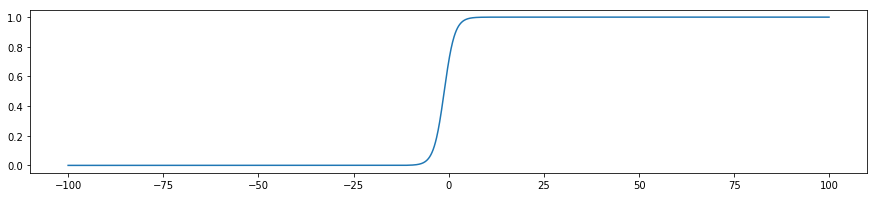

In [19]:
plt.figure(figsize=(15,3))

class logistic_regression(nn.Module):
    def __init__(self, in_size):
        super(logistic_regression, self).__init__()
        self.linear = nn.Linear(in_size, 1)

    def forward(self, x):
        out = F.sigmoid(self.linear(x))
        return out

z = torch.arange(-100, 100, 0.1).view(-1, 1)
model = logistic_regression(1)
yhat = model(z)
plt.plot(z.numpy(), yhat.detach().numpy())
plt.show()

In [22]:
model = nn.Sequential(nn.Linear(1, 1), nn.Sigmoid())
list(model.parameters())

[Parameter containing:
 tensor([[-0.5133]], requires_grad=True), Parameter containing:
 tensor([-0.6477], requires_grad=True)]

Having the parameters below `w = -0.5133` and `b = -0.6477`, we can calculate the following equation

$$\hat{y} = \sigma(-0.5133x -0.6477)$$

where $\sigma$ is equal to

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

Using the tensor with value equal to `1` we can test $\hat{y} by solving the equation as:

$\hat{y} = \sigma(-0.5133.(1) -0.6477)$<br>
$\hat{y} = \sigma(-0.5133 -0.6477)$<br>
$\hat{y} = \sigma(-1,161)$<br>
$\hat{y} = \frac{1}{1 + e^{1,161}}$<br>
$\hat{y} = 0.2385$

In [29]:
import numpy as np
def sigmoid(z): return 1./(1+np.exp(-z))
y = sigmoid(-0.5133*1 - 0.6477)
y

0.23848562743318105

Now that we know the answer, lets test the prediction of our model using a tensor with value equals `1.0`

In [30]:
x = torch.tensor([[1.0]])
yhat = model(x)
yhat

tensor([[0.2385]], grad_fn=<SigmoidBackward>)

## Testing a multi dimension input

In [31]:
x = torch.tensor([[1.0],[100.0]])
yhat = model(x)
yhat

tensor([[2.3847e-01],
        [2.6573e-23]], grad_fn=<SigmoidBackward>)

# Logistic Regression with Mean Square Error

For logistic regression we have the loss function as

$$l(w, b) = \frac{1}{N} \sum_{n=1}^{N} (y_n - \sigma(wx_n + b))^2$$

# Bernoulli Distribution

Flip a **biased** coin, where

<img src="images/tail_head.svg" width="30%">

Heads ($y=0$) $= 0.2 \rightarrow \theta=0.2$<br>
Tails ($y=1$) $= 0.8 \rightarrow 1-\theta=0.8$

Consider a sequence of 3 flips of the biased coin. In the first flip we have Tails ($1-\theta$).  In the second flip we have again Tails ($1-\theta$) and in the third flip, we have Heads ($\theta$). Thus, we have 

<img src="images/tail_tail_head.svg" width="30%">

$\text{Likelihood} = (1-\theta) \times (1-\theta) \times \theta$<br>
$\text{Likelihood} = 0.8 \times 0.8 \times 0.2$<br>
$\text{Likelihood} = 0,128$

## Bernoulli Distribution Function

We can represent the Bernoulli distribution as a function

$$p(y|\theta) = \theta^y(1-\theta)^{1-y}$$

Thus, the probability of $y=0$ is

$p(y=0|\theta) = \theta^0(1-\theta)^{1-0}$<br>
$p(y=0|\theta) = (1-\theta)$

And the probability of $y=1$ is

$p(y=1|\theta) = \theta^1(1-\theta)^{1-1}$<br>
$p(y=1|\theta) = \theta(1-\theta)^0$<br>
$p(y=1|\theta) = \theta$<br>

We can also represent the function for for all the independent samples as

$$p(Y|\theta) = \prod_{n=1}^{N} p(y_n|\theta)$$
$$p(Y|\theta) = \prod_{n=1}^{N} \theta^{y_n} (1-\theta)^{1-y_n}$$

Thus, our goal is to find a value of the parameter $\theta$ that maximizes the equation

$$\hat{\theta} = argmax_{\theta}\ \ p(Y|\theta)$$

It turns out that it's more interesting to maximize the log of the likelihood function given by the following expression:

$$\ell(\theta) = ln(p(Y|\theta)) = \sum_{n=1}^{N} ln(\theta) + (1 - y_n)\ ln(1-\theta)$$

Because the log is monotonically increasing it may change the shape of the function. On the other hand, it does not change the location of a maximum value for the parameter $\theta$.

<Figure size 1080x216 with 0 Axes>

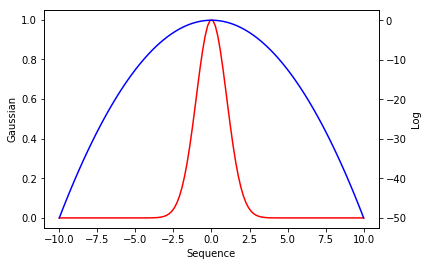

In [35]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
plt.figure(figsize=(15,3))

def gaussian(x, mu=0, sig=1):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

x_values = np.linspace(-10, 10, 120)
x_gaussian = gaussian(x_values)
x_log = np.log(x_gaussian)

# plot both curves in the same figure
fig = plt.figure()
host = fig.add_subplot(111)
part = host.twinx()

host.set_xlabel("Sequence")
host.set_ylabel("Gaussian")
part.set_ylabel("Log")

p1, = host.plot(x_values, x_gaussian, 'r')
p2, = part.plot(x_values, x_log, 'b')

plt.show()

# Cross Entropy Loss

Cross entropy loss is our total loss or cost function for logistic regression and is calculated as:

$$\ell(w) = -\frac{1}{N} \sum_{n=1}^{N} y_n\ ln(\sigma(wx_n + b)) + (1 - y_n)\ ln(1 - \sigma(wx_n + b))$$

In [36]:
def criterion(yhat, y):
    out = -1 * torch.mean(y * torch.log(yhat) + (1 - y) * torch.log(1 - yhat))
    return out

# Training Logistic Regression in PyTorch Cross Entropy

We can create the model using the `Sequential` module with the linear function followed by the sigmoid as:

In [37]:
model = nn.Sequential(nn.Linear(1,1), nn.Sigmoid())

Or we can create a custom model as

In [40]:
import torch.nn as nn

class logistic_reg(nn.Module):
    def __init__(self, in_size, out_size):
        super(logistic_reg, self).__init__()
        self.linear = nn.Linear(in_size, 1)

    def forward(self, x):
        out = F.sigmoid(self.linear(x))
        return out

As loss function, we can use one of the follows:

In [39]:
# Mean Square Error Loss
def criterion(yhat, y):
    out = torch.mean((yhat - y)**2)
    return out
    
# The build-in loss function for MSE 
criterion = nn.MSELoss()

# The Binary Cross-Entropy Loss
def criterion(yhat, y):
    out = -1 * torch.mean(y * torch.log(yhat) + (1 - y) * torch.log(1 - yhat))
    
# Or use the build-in Pytorch function
criterion = nn.BCELoss()

In [44]:
from torch.utils.data import Dataset, DataLoader
from torch import optim

class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.f = 3*self.x+1
        self.y = self.f + 0.1*torch.randn(self.x.size())
        self.len = self.x.shape[0]

        
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    
    def __len__(self):
        return self.len

dataset = Data()
trainloader = DataLoader(dataset=dataset, batch_size=1)

model = logistic_reg(1,1)
optimizer = optim.SGD(model.parameters(), lr=0.01)

acc_loss = []
for epoch in range(10):
    for x, y in trainloader:
        yhat = model(x)
        loss = criterion(yhat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    acc_loss.append(loss)

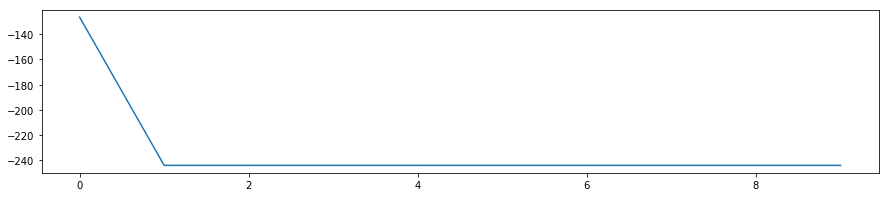

In [45]:
plt.figure(figsize=(15,3))
plt.plot(range(len(acc_loss)), acc_loss)
plt.show()